In [214]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [367]:
data_march = pd.read_csv('march.csv', sep=',', encoding='cp1251')
data_march = data_march.fillna(0)
index_of_outler = data_march[(data_march['Отклонение от/ФО'] != 0) | (data_march['Отклонение от/РФ'] == 0)].index
data_march = data_march.drop(index=index_of_outler)
data_march.index = data_march['Территория']
del data_march['Территория']
del data_march['Ранг по/ФО']
del data_march['Отклонение от/ФО']
for col in data_march.columns:
    data_march[col] = list(map(lambda obj: str(obj).replace(',', '.').replace(' ', '').replace('%', ''), data_march[col]))
    data_march[col] = data_march[col].astype('float64')
data_march

,Значение (январь-март 2019г),к АППГ (январь-март 2018г)/отклонение,к АППГ (январь-март 2018г)/темп роста,Отклонение от/РФ,Ранг по/РФ
Территория,,,,,
Дальневосточный федеральный округ,32652.58,-542.42,98.4,2732.33,3.0
Приволжский федеральный округ,25066.82,-8978.18,73.6,-4853.43,5.0
Северо-Западный федеральный округ,32145.12,-17819.88,64.3,2224.87,4.0
Северо-Кавказский федеральный округ,20322.11,-15869.89,56.2,-9598.15,8.0
Сибирский федеральный округ,23233.73,-10255.27,69.4,-6686.52,7.0
Уральский федеральный округ,33439.20,-10498.80,76.1,3518.95,2.0
Центральный федеральный округ,39957.05,-17803.95,69.2,10036.80,1.0
Южный федеральный округ,24509.56,-12575.44,66.1,-5410.70,6.0


In [369]:
data_juny = pd.read_csv('juny.csv', sep=',', encoding='cp1251')
data_juny = data_juny.fillna(0)
index_of_outler = data_juny[(data_juny['Отклонение от/ФО'] != 0) | (data_juny['Отклонение от/РФ'] == 0)].index
data_juny = data_juny.drop(index=index_of_outler)
data_juny.index = data_juny['Территория']
del data_juny['Территория']
del data_juny['Ранг по/ФО']
del data_juny['Отклонение от/ФО']
for col in data_juny.columns:
    data_juny[col] = list(map(lambda obj: str(obj).replace(',', '.').replace(' ', '').replace('%', ''), data_juny[col]))
    data_juny[col] = data_juny[col].astype('float64')
data_juny

,Значение (январь-июнь 2019г),к АППГ (январь-июнь 2018г)/отклонение,к АППГ (январь-июнь 2018г)/темп роста,Отклонение от/РФ,Ранг по/РФ
Территория,,,,,
Дальневосточный федеральный округ,38182.0,-1182.0,97.0,3757.0,2.0
Приволжский федеральный округ,27658.0,580.0,102.1,-6767.0,6.0
Северо-Западный федеральный округ,37063.0,4184.0,112.7,2638.0,3.0
Северо-Кавказский федеральный округ,23137.0,358.0,101.6,-11288.0,8.0
Сибирский федеральный округ,26854.0,1908.0,107.6,-7571.0,7.0
Уральский федеральный округ,36901.0,3159.0,109.4,2476.0,4.0
Центральный федеральный округ,46853.0,4656.0,111.0,12428.0,1.0
Южный федеральный округ,28556.0,98.0,100.3,-5869.0,5.0


In [370]:
data_september = pd.read_csv('september.csv', sep=',', encoding='cp1251')
data_september = data_september.fillna(0)
index_of_outler = data_september[(data_september['Отклонение от/ФО'] != 0) | (data_september['Отклонение от/РФ'] == 0)].index
data_september = data_september.drop(index=index_of_outler)
data_september.index = data_september['Территория']
del data_september['Территория']
del data_september['Ранг по/ФО']
del data_september['Отклонение от/ФО']
for col in data_september.columns:
    data_september[col] = list(map(lambda obj: str(obj).replace(',', '.').replace(' ', '').replace('%', ''), data_september[col]))
    data_september[col] = data_september[col].astype('float64')
data_september

,Значение (январь-сентябрь 2019г),к АППГ (январь-сентябрь 2018г)/отклонение,к АППГ (январь-сентябрь 2018г)/темп роста,Отклонение от/РФ,Ранг по/РФ
Территория,,,,,
Дальневосточный федеральный округ,36893.0,4580.0,114.2,1808.0,2.0
Приволжский федеральный округ,28039.0,2478.0,109.7,-7046.0,6.0
Северо-Западный федеральный округ,35896.0,4453.0,114.2,811.0,4.0
Северо-Кавказский федеральный округ,24842.0,-83.0,99.7,-10243.0,8.0
Сибирский федеральный округ,25832.0,3918.0,117.9,-9253.0,7.0
Уральский федеральный округ,36242.0,4472.0,114.1,1157.0,3.0
Центральный федеральный округ,46899.0,7602.0,119.3,11814.0,1.0
Южный федеральный округ,31858.0,3316.0,111.6,-3227.0,5.0


In [371]:
data_december = pd.read_csv('december.csv', sep=',', encoding='cp1251')
data_december = data_december.fillna(0)
index_of_outler = data_december[(data_december['Отклонение от/ФО'] != 0) | (data_december['Отклонение от/РФ'] == 0)].index
data_december = data_december.drop(index=index_of_outler)
data_december.index = data_december['Территория']
del data_december['Территория']
del data_december['Ранг по/ФО']
del data_december['Отклонение от/ФО']
for col in data_december.columns:
    data_december[col] = list(map(lambda obj: str(obj).replace(',', '.').replace(' ', '').replace('%', ''), data_december[col]))
    data_december[col] = data_december[col].astype('float64')
data_december

,Значение (январь-декабрь 2019г),к АППГ (январь-декабрь 2018г)/отклонение,к АППГ (январь-декабрь 2018г)/темп роста,Отклонение от/РФ,Ранг по/РФ
Территория,,,,,
Дальневосточный федеральный округ,43516.0,-8884.0,83.0,2640.0,3.0
Приволжский федеральный округ,32627.0,-4102.0,88.8,-8249.0,6.0
Северо-Западный федеральный округ,43683.0,-8090.0,84.4,2807.0,2.0
Северо-Кавказский федеральный округ,30027.0,-6606.0,82.0,-10849.0,8.0
Сибирский федеральный округ,30971.0,-4623.0,87.0,-9905.0,7.0
Уральский федеральный округ,40504.0,-7119.0,85.1,-372.0,4.0
Центральный федеральный округ,54008.0,-9176.0,85.5,13132.0,1.0
Южный федеральный округ,34610.0,-4467.0,88.6,-6266.0,5.0


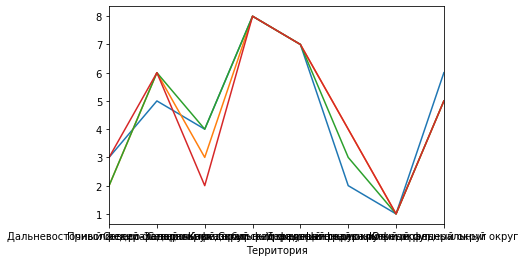

In [374]:
data_march['Ранг по/РФ'].plot()
data_juny['Ранг по/РФ'].plot()
data_september['Ранг по/РФ'].plot()
data_december['Ранг по/РФ'].plot()

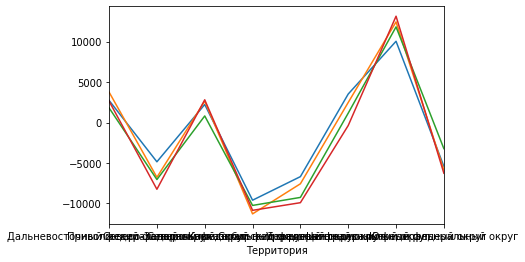

In [378]:
i = 3
data_march[data_march.columns[i]].plot()
data_juny[data_juny.columns[i]].plot()
data_september[data_september.columns[i]].plot()
data_december[data_december.columns[i]].plot()

'Значение (январь-декабрь 2019г)'

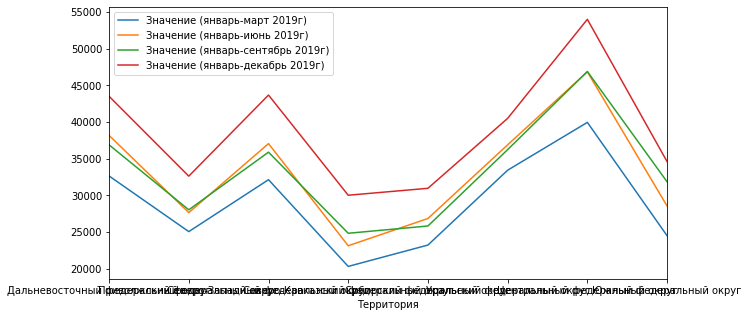

In [389]:
i = 0
data_march[data_march.columns[i]].plot(figsize=(10, 5), legend=True)
data_juny[data_juny.columns[i]].plot(legend=True)
data_september[data_september.columns[i]].plot(legend=True)
data_december[data_december.columns[i]].plot(legend=True)

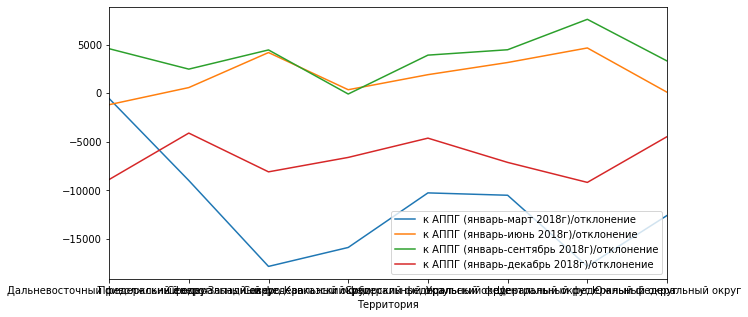

In [390]:
i = 1
data_march[data_march.columns[i]].plot(figsize=(10, 5), legend=True)
data_juny[data_juny.columns[i]].plot(legend=True)
data_september[data_september.columns[i]].plot(legend=True)
data_december[data_december.columns[i]].plot(legend=True)

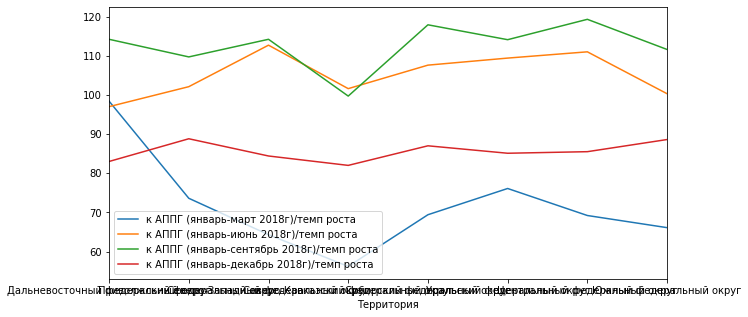

In [391]:
i = 2
data_march[data_march.columns[i]].plot(figsize=(10, 5), legend=True)
data_juny[data_juny.columns[i]].plot(legend=True)
data_september[data_september.columns[i]].plot(legend=True)
data_december[data_december.columns[i]].plot(legend=True)

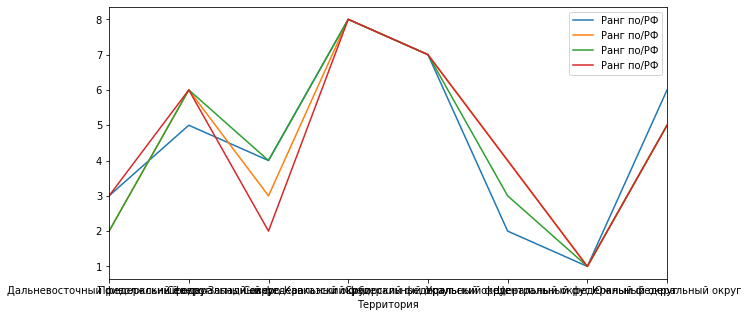

In [392]:
i = 4
data_march[data_march.columns[i]].plot(figsize=(10, 5), legend=True)
data_juny[data_juny.columns[i]].plot(legend=True)
data_september[data_september.columns[i]].plot(legend=True)
data_december[data_december.columns[i]].plot(legend=True)

In [222]:
ex_rates = pd.read_csv('USDRUB_200901_201128.csv', sep=';')
ex_rates['DATE'] = ex_rates.index
ex_rates.index = pd.RangeIndex(len(ex_rates))
ex_rates['<LAST>'] = ex_rates['<LAST>'].astype('float64')
ex_rates

,<DATE>,<TIME>,<LAST>,<VOL>,<ID>,<OPER>,DATE
0,01:00:00,73.8850,73.9714,73.7400,73.9677,136,01/09/20
1,02:00:00,73.9329,73.9329,73.5670,73.7805,463,01/09/20
2,03:00:00,73.7773,73.8842,73.6140,73.8464,514,01/09/20
3,04:00:00,73.8460,73.9256,73.5750,73.8455,561,01/09/20
4,05:00:00,73.8440,73.9435,73.5900,73.9290,433,01/09/20
...,...,...,...,...,...,...,...
1596,22:00:00,75.9900,76.0313,75.9350,76.0055,7718,27/11/20
1597,23:00:00,75.9970,76.0500,75.8977,75.9689,11906,27/11/20
1598,00:00:00,75.9405,76.0700,75.7760,76.0330,14858,28/11/20
1599,01:00:00,76.0326,76.0638,75.7840,75.9980,404,28/11/20


In [123]:
index_rates = []
for date in ex_rates.index:
    index_rates.append(pd.to_datetime(ex_rates.loc[date, 'DATE'] + ' ' + ex_rates.loc[date, '<DATE>'], format='%d/%m/%y %H:%M:%S'))
ex_rates.index = pd.Index(index_rates)
ex_rates

,<DATE>,<TIME>,<LAST>,<VOL>,<ID>,<OPER>,DATE
2020-09-01 01:00:00,01:00:00,73.8850,73.9714,73.7400,73.9677,136,01/09/20
2020-09-01 02:00:00,02:00:00,73.9329,73.9329,73.5670,73.7805,463,01/09/20
2020-09-01 03:00:00,03:00:00,73.7773,73.8842,73.6140,73.8464,514,01/09/20
2020-09-01 04:00:00,04:00:00,73.8460,73.9256,73.5750,73.8455,561,01/09/20
2020-09-01 05:00:00,05:00:00,73.8440,73.9435,73.5900,73.9290,433,01/09/20
...,...,...,...,...,...,...,...
2020-11-27 22:00:00,22:00:00,75.9900,76.0313,75.9350,76.0055,7718,27/11/20
2020-11-27 23:00:00,23:00:00,75.9970,76.0500,75.8977,75.9689,11906,27/11/20
2020-11-28 00:00:00,00:00:00,75.9405,76.0700,75.7760,76.0330,14858,28/11/20
2020-11-28 01:00:00,01:00:00,76.0326,76.0638,75.7840,75.9980,404,28/11/20


In [124]:
rate_rus_usd = pd.DataFrame(columns=['Электроэнергия', 'Дата'])
current_date = electro.loc[0, 'M_DATE']
for i in electro.index:
    if electro.loc[i, 'M_DATE'] != current_date:
        break
    current_date = electro.loc[i, 'M_DATE']
    oes_center.loc[i] = [electro.loc[i, 'E_USE_FACT'], current_date]
for _ in range(1):
    index_of_outler = oes_center[oes_center['Электроэнергия'] == oes_center['Электроэнергия'].min()].index[0]
    oes_center = oes_center.drop(index=index_of_outler)
oes_center

,Электроэнергия,Дата
0,68776,2020-09-01 00:00:00
1,67846,2020-09-01 01:00:00
2,67186,2020-09-01 02:00:00
3,67243,2020-09-01 03:00:00
4,67973,2020-09-01 04:00:00
...,...,...
2107,102139,2020-11-27 19:00:00
2108,99942,2020-11-27 20:00:00
2109,98026,2020-11-27 21:00:00
2110,93901,2020-11-27 22:00:00


In [125]:
electro = pd.read_csv('Генерация и потребление_01.09.2020.csv', sep=';')
electro['INTERVAL'] = electro['INTERVAL'].astype('int64')
for i in electro.index:
    if i % 1000 == 0:
        print(100 * i // len(electro.index), end=' ')
    electro.loc[i, 'M_DATE'] = pd.to_datetime(electro.loc[i, 'M_DATE'].split()[0], format='%d.%m.%Y') + datetime.timedelta(hours=int(electro.loc[i, 'INTERVAL']))
electro

0 5 11 17 23 29 35 41 47 53 59 65 71 76 82 88 94 

,INTERVAL,M_DATE,PRICE_ZONE_ID,POWER_SYS_ID,E_USE_FACT,E_USE_PLAN,GEN_FACT,GEN_PLAN
0,0,2020-09-01 00:00:00,1,0,68776,69795,71440,71807
1,1,2020-09-01 01:00:00,1,0,67846,68051,69345,69124
2,2,2020-09-01 02:00:00,1,0,67186,67202,68187,68269
3,3,2020-09-01 03:00:00,1,0,67243,67527,68940,69193
4,4,2020-09-01 04:00:00,1,0,67973,68572,70114,70459
...,...,...,...,...,...,...,...,...
16891,19,2020-11-27 19:00:00,1,840000,12381,12408,13292,13338
16892,20,2020-11-27 20:00:00,1,840000,12202,12247,13467,12964
16893,21,2020-11-27 21:00:00,1,840000,11943,11934,12987,12788
16894,22,2020-11-27 22:00:00,1,840000,11594,11564,13251,12676


In [239]:
oes_center = pd.DataFrame(columns=['Электроэнергия', 'Электроэнергия план'])
oes_center_mean = pd.DataFrame(columns=['Электроэнергия', 'Электроэнергия план', 'Доллары'])
prev_date = electro.loc[0, 'M_DATE']
cuurent_day = current_date.day
energy = 0
energy_plan = 0
bucks = 0
for i in electro.index:
    if i % 100 == 0:
        print(i, end=' ')
    if electro.loc[i, 'M_DATE'] < prev_date:
        break
    if electro.loc[i, 'M_DATE'].day != prev_date.day:
        oes_center_mean.loc[i] = [energy/24, energy_plan/24, bucks/24]
        bucks = 0
        energy = 0
        energy_plan = 0
    energy += electro.loc[i, 'E_USE_FACT']
    energy_plan += electro.loc[i, 'E_USE_PLAN']
    if i in ex_rates.index:
        bucks += ex_rates.loc[i, '<LAST>']
    prev_date = electro.loc[i, 'M_DATE']
    oes_center.loc[prev_date] = [electro.loc[i, 'E_USE_FACT'], prev_date]
for _ in range(1):
    index_of_outler = oes_center[oes_center['Электроэнергия'] == oes_center['Электроэнергия'].min()].index[0]
    oes_center = oes_center.drop(index=index_of_outler)
oes_center_mean['Доллары'] *= 79125.958333/73.771765
oes_center_mean

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 

,Электроэнергия,Электроэнергия план,Доллары
24,79125.958333,79700.250000,73.771765
48,79434.250000,79881.625000,74.419916
72,79770.791667,80060.833333,75.460754
96,79699.000000,79988.541667,75.356558
120,76688.958333,77067.416667,75.621740
...,...,...,...
1992,94043.791667,94609.791667,0.000000
2016,98116.500000,98775.916667,0.000000
2040,97605.041667,98284.750000,0.000000
2064,97609.625000,98236.666667,0.000000


In [235]:
oes_center_mean['Доллары'].value_counts()

0.000000     20
79.240056     1
74.419916     1
77.448902     1
75.678875     1
             ..
76.051228     1
75.177593     1
77.010047     1
77.020249     1
78.255522     1
Name: Доллары, Length: 68, dtype: int64

In [244]:
index_of_outler = oes_center_mean[oes_center_mean['Доллары'] == 0].index
oes_center_mean = oes_center_mean.drop(index=index_of_outler)
oes_center_mean = oes_center_mean.drop(index=oes_center_mean.index[-1])
oes_center_mean

,Электроэнергия,Электроэнергия план,Доллары
24,79125.958333,79700.250000,79125.958333
48,79434.250000,79881.625000,79821.150983
72,79770.791667,80060.833333,80937.530639
96,79699.000000,79988.541667,80825.772053
120,76688.958333,77067.416667,81110.200919
...,...,...,...
1488,86258.916667,86726.000000,81756.109512
1512,90002.083333,90624.833333,81650.378813
1536,89806.875000,90215.083333,81253.184479
1560,87090.125000,87386.083333,81171.482205


In [127]:
for _ in range(2):
    index_of_outler = oes_center_mean[oes_center_mean['Электроэнергия'] == oes_center_mean['Электроэнергия'].max()].index[0]
    oes_center_mean = oes_center_mean.drop(index=index_of_outler)
oes_center_mean.head(10)

,Электроэнергия,Дата
24,79125.958333,2020-09-01 23:00:00
48,79434.250000,2020-09-02 23:00:00
72,79770.791667,2020-09-03 23:00:00
96,79699.000000,2020-09-04 23:00:00
120,76688.958333,2020-09-05 23:00:00
144,75223.375000,2020-09-06 23:00:00
168,78679.458333,2020-09-07 23:00:00
192,78898.916667,2020-09-08 23:00:00
216,78846.958333,2020-09-09 23:00:00
240,79286.000000,2020-09-10 23:00:00


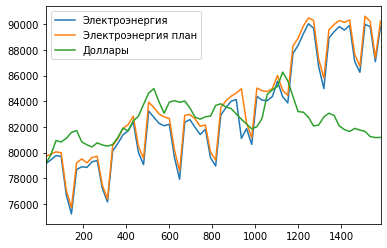

In [245]:
oes_center_mean[['Электроэнергия', 'Электроэнергия план', 'Доллары']].plot()

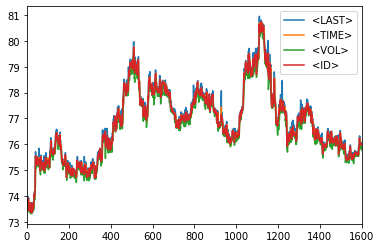

In [246]:
ex_rates[['<LAST>', '<TIME>', '<VOL>', '<ID>']].plot()

In [305]:
y = oes_center_mean['Электроэнергия'].to_numpy()
x = oes_center_mean['Электроэнергия план'].to_numpy()

In [306]:
x

array([79700.25      , 79881.625     , 80060.83333333, 79988.54166667,
       77067.41666667, 75713.125     , 79193.95833333, 79511.91666667,
       79201.33333333, 79616.375     , 79714.83333333, 77466.08333333,
       76386.08333333, 80529.375     , 81090.83333333, 81885.75      ,
       82173.29166667, 82834.95833333, 80500.95833333, 79553.04166667,
       83934.75      , 83506.375     , 83015.        , 82784.29166667,
       82663.95833333, 80206.04166667, 78570.625     , 82900.70833333,
       82971.83333333, 82627.5       , 82050.75      , 82155.54166667,
       80044.75      , 79415.16666667, 83500.125     , 84042.375     ,
       84395.70833333, 84638.79166667, 84973.875     , 82298.20833333,
       81176.45833333, 85028.79166667, 84822.        , 84756.91666667,
       84978.45833333, 86008.25      , 84860.95833333, 84459.25      ,
       88308.125     , 88909.08333333, 89854.58333333, 90491.91666667,
       90300.375     , 87291.70833333, 85800.70833333, 89591.        ,
      

In [307]:
y

array([79125.95833333, 79434.25      , 79770.79166667, 79699.        ,
       76688.95833333, 75223.375     , 78679.45833333, 78898.91666667,
       78846.95833333, 79286.        , 79379.95833333, 77216.04166667,
       76153.375     , 80129.5       , 80703.45833333, 81388.125     ,
       81697.125     , 82385.79166667, 80020.58333333, 79062.375     ,
       83238.04166667, 82751.54166667, 82277.25      , 82093.5       ,
       82203.83333333, 79625.79166667, 77926.95833333, 82376.625     ,
       82568.58333333, 81962.54166667, 81404.29166667, 81824.58333333,
       79602.25      , 78951.125     , 82917.29166667, 83508.33333333,
       84005.45833333, 84133.625     , 81107.375     , 81874.08333333,
       80640.5       , 84390.5       , 84086.70833333, 84043.33333333,
       84365.45833333, 85563.83333333, 84352.375     , 83871.91666667,
       87714.83333333, 88354.95833333, 89240.45833333, 90040.04166667,
       89698.70833333, 86699.875     , 84989.625     , 88922.75      ,
      

In [308]:
oes_center['Электроэнергия']

2020-09-01 00:00:00     68776
2020-09-01 01:00:00     67846
2020-09-01 02:00:00     67186
2020-09-01 03:00:00     67243
2020-09-01 04:00:00     67973
                        ...  
2020-11-27 19:00:00    102139
2020-11-27 20:00:00     99942
2020-11-27 21:00:00     98026
2020-11-27 22:00:00     93901
2020-11-27 23:00:00     90585
Name: Электроэнергия, Length: 2111, dtype: object

In [309]:
y_list = pd.DataFrame(columns=['index'])
x_list = pd.DataFrame(columns=['index'])
for time in y.index:
    if time in x.index:
        x_list.loc[time] = x.loc[time]
        y_list.loc[time] = y.loc[time]

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [310]:
x_list

,index


In [311]:
y_list

,index


In [209]:
x = x_list.astype('float64').to_numpy()
y = y_list.astype('float64').to_numpy()

In [312]:
x = x.reshape(-1, 1)

In [313]:
y = y.reshape(-1, 1)

In [331]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=16
)

model = linear_model.LinearRegression()

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.9708475047028117

In [318]:
y_test

array([[88354.95833333],
       [90002.08333333],
       [83871.91666667],
       [89806.875     ],
       [89812.25      ],
       [81874.08333333],
       [82093.5       ],
       [79125.95833333],
       [86699.875     ],
       [79699.        ],
       [76688.95833333],
       [87092.875     ],
       [80703.45833333],
       [78846.95833333]])

In [319]:
model.predict(x_test)

array([[88236.73228654],
       [89923.67255408],
       [83861.61759393],
       [89520.80280346],
       [89601.46688104],
       [81736.86270112],
       [82214.78404652],
       [79182.52755562],
       [86646.51517145],
       [79465.97842042],
       [76593.90300791],
       [87005.8369716 ],
       [80549.76113881],
       [78691.98836567]])